# Volatility decay in Leveraged ETFs
Leveraged ETFs are designed to amplify the returns of a benchmark index by a certain factor, usually 2x or 3x, on a daily basis. 
For example if an ETF promises a return of 2 times the S&P 500 index then if the S&P 500 index goes up 1% in one day the ETF will go up 2 x 1% = 2%.
##
There is a common myth about Leveraged ETFs which states that they are not suitable for long term buy and hold. This article rectifies that deficiency and finds that the claims are false.
##
The explanation popularly given for this myth is that volatility eats away at long term returns. If this were true then non-leveraged funds would also not be suitable for buy and hold because they too suffer from volatility.


## Origins of the myth
Daily volatility hurts the returns of leveraged ETFs (including unleveraged ETFs). The math is simple. If the market goes down by $x$ one day and up by the same $x$ the next day, the net returns after the 2 days are given by:
###
$(1 - x)(1 + x) = 1 - x^2$
###
As $x^2$ is positive but the sign in front is negative, your position will always suffer a loss of $x^2$. The example in the paper is that the market goes down 5% one day, then up by 5%. The net result is $(1-0.05)(1+0.05)= 0.9975$; a loss of 0.0025 or 0.25%. 
So whenever the market has volatility we lose money. We call this <i>volatility drag</i>. 

Increasing leverage increases the value of $x$, and therefore $x^2$, causing greater volatility decay. Even an ETF with a leverage of 1 has volatility drag. 

The myth has resulted from the belief that volatility drag will drag any leveraged ETF down to zero given enough time. Conventional wisdom has decided that employing no leverage, which is in fact a 1x multiple, might strike the optimal balance between volatility decay and capturing market returns. Yet there’s nothing special about a 1x multiple, nor any inherent reason that 1x leverage is “optimal”. The “optimal” amount of leverage, under historical market conditions, might be 0.8x, 1.2x or 1.5x or some such. It is very unlikely to be neatly 1x. 



 




In fact, it is no secret that at least in the past decade, if an investor used a “buy and hold” strategy on 2x or 3x leveraged ETFs, they would have significantly outperformed a 1x “buy and hold” strategy of the underlying index (see figure 1):


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


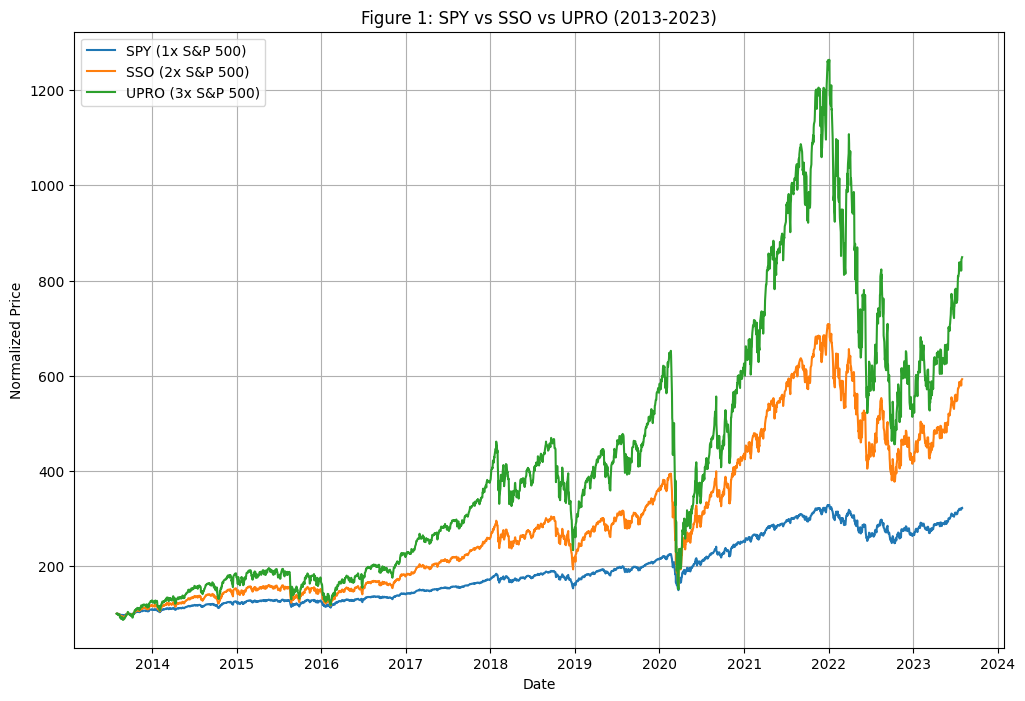

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for SPY (1x S&P 500), SSO (2x S&P 500), and UPRO (3x S&P 500)
start_date = '2013-08-01'
end_date = '2023-08-01'
spy = yf.download('SPY', start=start_date, end=end_date)
sso = yf.download('SSO', start=start_date, end=end_date)
upro = yf.download('UPRO', start=start_date, end=end_date)

# Normalize the data to start at the same point
spy['Normalized'] = spy['Adj Close'] / spy['Adj Close'].iloc[0] * 100
sso['Normalized'] = sso['Adj Close'] / sso['Adj Close'].iloc[0] * 100
upro['Normalized'] = upro['Adj Close'] / upro['Adj Close'].iloc[0] * 100

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(spy['Normalized'], label='SPY (1x S&P 500)')
plt.plot(sso['Normalized'], label='SSO (2x S&P 500)')
plt.plot(upro['Normalized'], label='UPRO (3x S&P 500)')
plt.title('Figure 1: SPY vs SSO vs UPRO (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()


Of course, the past decade has also seen an almost uninterrupted bull run except for the brief market crash in 2020 from COVID. There’s no question that when the markets go up rapidly, leverage amplifies the gains. The argument against leveraged ETFs always boils down to underperformance when the markets are volatile. 

The actual stock market experiences daily fluctuations, cyclic crashes and downturns which last from months to years, and overall positive returns over longer time horizons (decades). This is the general expectation for most investors and it also forms the foundation for long-term, buy and hold index investing. 



testing